# Signal sampling and aliasing

If the signal we are sampling is under-sampled temporally, the spectral energy will be misidentified, error will be introduced, and different signals to become indistinguishable. The aim of this example is to illustrate this issue. 

For discrete sampling of a signal, the Nyquist rate must be met. The Nyquist rate is the minimum sampling rate that satisfies the Nyquist sampling criterion for a given signal or family of signals. The Nyquist rate is twice the maximum component frequency of the function being sampled. 

In the example below, we consider a time-domain signal consisting of a sum on sinusoidal signals with frequencies of 6, 3, and 2 Hz. The bandwidth of the signal is therefore 6 Hz and the Nyquist rate is 12 Hz, or twice the bandwidth of the bandlimited signal. But, what happens if we sample at a rate less than 12 Hz? If we look at the FFT, we see that the signal becomes aliased and all spectral components are not accurately accounted for. 

Packages/libraries

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np
import math

Function to calculate next power of 2 of value x (use for zeor-padding signal)

In [148]:
''' 
calculate the next power of 2 of x
'''
def nextpow2(x):
    return (x-1).bit_length()

Generate a time-domain signal $y(t)$ composed of two sine waves with frequencies $f_0$ and $f_0/2$

In [193]:
'''
function: time signal function with primary componenet f0 sampled at Fs
'''
def timeSignal(f0, Fs): # signal will be aliased for f_0 < 2*Fs
    # calcualted paramters
    t = np.arange(0,float(10/f0),float(1/Fs))# time vector (12 cycles)
    #  signal y 
    y = 15*np.sin(2 * np.pi * f0 * t)         # primary component
    y = 8*np.sin(2 * np.pi * f0/2 * t) + y    # spectral component 1
    y = 4*np.sin(2 * np.pi * f0/3 * t) + y    # spectral component 2

    # add noise to signal 
    noise = np.random.normal(0,.5,len(t)) # noise
    y = y + noise # signal plus noise

    return y, t, noise

Calculate Fourier transform of signal $Y(f)$

In [194]:
''' 
function: frequency spectrum using FFT 
'''
def freqSignal(y,Fs):
    nfft = 4**nextpow2(len(y))  # zero pad length
    f  = np.linspace(0,Fs,nfft) # freq vec for signal
    # fft and normalize ---------------
    Y = np.fft.fft(y,nfft) # fft of y (non-noisey signal)
    Y = np.abs(Y)**2       # square the abs value of Y
    Y = 2.0/nfft*Y         # normalize 
    #Y = (Y/max(Y))        # normalize to max val
    
    return Y, f


Lets compare what happens when the Nyquist limit is not achieved vs when it is. Notice in the bottom figure, the blue line does not accurately represent the spectral energy across the entire frequency spectrum. 


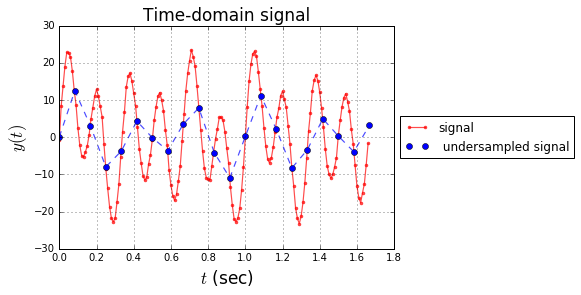

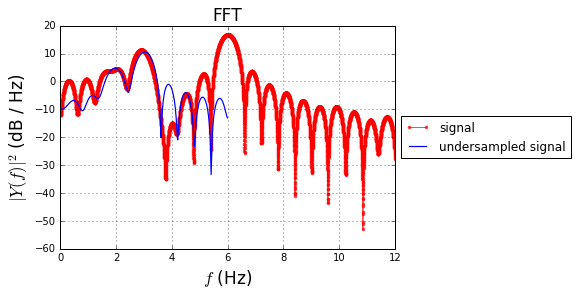

In [197]:
# signal not aliased
f0 = 6; # fundamental frequency for both signals
Fs = 100   # samp freq > 2 Signal freq
Fs2 = 12 # under-sampled frequency

# Calculate: time domain signals:
y, t, noise    = timeSignal(f0, Fs)# correctly sampled signal
y2, t2, noise2 = timeSignal(f0, Fs2)# under-sampled signal
# Calculate: fft's:
Y, freq   = freqSignal(y, Fs) # correctly sampled signal
Y2, freq2 = freqSignal(y2, Fs2)# under-sampled signal



# plot time-domain signal
plt.figure()
plt.plot(t, y,'r.-',linewidth=1.2,alpha=0.7, label='signal')
plt.plot(t2, y2,'bo',linewidth=1.2, label=' undersampled signal')
plt.plot(t2, y2,'b--',alpha=0.7,linewidth=1.2)
plt.grid()
plt.ylabel('$y(t)$', fontsize=17)
plt.xlabel('$t$ (sec)',fontsize=17)
plt.title('Time-domain signal',fontsize=17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plot FFTs
plt.figure()
idxlen = int(round(len(Y)/2))
idxlen2 = int(round(len(Y2)/2))
plt.plot(freq[:idxlen], 10*np.log10(Y[:idxlen]), 'r.-',alpha=.7,label='signal')
plt.plot(freq2[:idxlen2], 10*np.log10(Y2[:idxlen2]), 'b-',linewidth=1.2,label='undersampled signal')
plt.ylabel('$|Y(f)|^2$ (dB / Hz)', fontsize=17)
plt.xlabel('$f$ (Hz)', fontsize=17)
plt.title('FFT', fontsize=17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim([0,f0*2])
#plt.ylim([-48,0])
plt.grid()
plt.show()